In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
# from tensorflow.python import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv('POP.csv')
df.head()

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.0,1952-01-01,2019-12-06
1,2019-12-06,156527.0,1952-02-01,2019-12-06
2,2019-12-06,156731.0,1952-03-01,2019-12-06
3,2019-12-06,156943.0,1952-04-01,2019-12-06
4,2019-12-06,157140.0,1952-05-01,2019-12-06


In [7]:
df['date'] = pd.to_datetime(df['date'])

<AxesSubplot: xlabel='date', ylabel='value'>

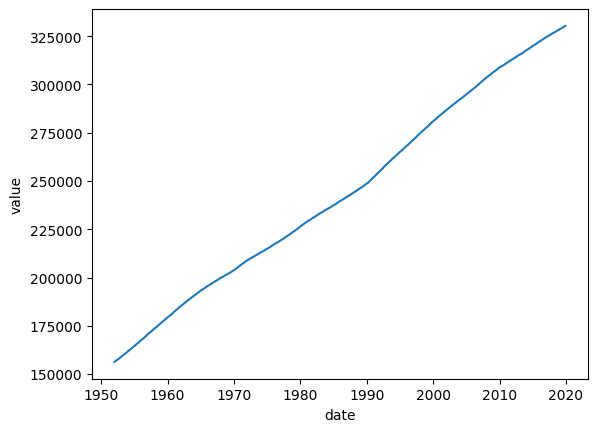

In [8]:
sns.lineplot(x='date', y='value', data=df)

In [52]:
def create_window(target, window=1, offset=0):
    feature_new, target_new = [], []
    # Convert our series to a numpy array
    target_np = target.to_numpy()
    for index in range(window, target.shape[0] - offset):
        feature_new.append(target_np[index - window: index])
        target_new.append(target_np[index+offset])
    return np.array(feature_new), np.array(target_new)

In [64]:
df = df.sort_values(by=['date'])
window = 100
feature, target = create_window(df['value'], window=window)
print(feature[0])
print(target[0])
print(df.head(6))

[156309. 156527. 156731. 156943. 157140. 157343. 157553. 157798. 158053.
 158306. 158451. 158757. 158973. 159170. 159349. 159556. 159745. 159956.
 160184. 160449. 160718. 160978. 161223. 161453. 161690. 161912. 162124.
 162350. 162564. 162790. 163026. 163290. 163570. 163847. 164107. 164349.
 164588. 164809. 165018. 165251. 165463. 165695. 165931. 166192. 166473.
 166755. 167023. 167270. 167513. 167746. 167977. 168221. 168436. 168659.
 168903. 169191. 169488. 169780. 170063. 170315. 170571. 170806. 171029.
 171271. 171501. 171741. 171984. 172257. 172538. 172816. 173070. 173298.
 173533. 173746. 173945. 174176. 174397. 174639. 174882. 175143. 175413.
 175697. 175966. 176207. 176447. 176685. 176905. 177146. 177365. 177591.
 177830. 178101. 178376. 178657. 178921. 179153. 179386. 179597. 179788.
 180007.]
180222.0
  realtime_start     value       date realtime_end
0     2019-12-06  156309.0 1952-01-01   2019-12-06
1     2019-12-06  156527.0 1952-02-01   2019-12-06
2     2019-12-06  156731.

In [65]:
scaler_feature = StandardScaler()
feature_shape = feature.shape
feature_scaled = scaler_feature.fit_transform(feature)
feature_scaled[0]

array([-1.74095559, -1.74070942, -1.74078131, -1.74067567, -1.74091374,
       -1.74102135, -1.74097627, -1.74014228, -1.73908162, -1.73806546,
       -1.73949568, -1.73728667, -1.73710734, -1.73735841, -1.73802062,
       -1.73805433, -1.73849977, -1.7384544 , -1.73803056, -1.73677243,
       -1.73542195, -1.73427231, -1.73345901, -1.73298381, -1.73234824,
       -1.73204918, -1.73197588, -1.73158708, -1.7314709 , -1.7310858 ,
       -1.73047705, -1.729236  , -1.72763014, -1.72608673, -1.7249218 ,
       -1.72415976, -1.72346143, -1.7231663 , -1.72314106, -1.72257455,
       -1.72248284, -1.7219418 , -1.72131295, -1.72012061, -1.71847378,
       -1.71679863, -1.71543337, -1.71453678, -1.71372615, -1.71313739,
       -1.71259103, -1.71175006, -1.71156211, -1.7111952 , -1.71035655,
       -1.70852538, -1.70648525, -1.70455041, -1.70281106, -1.70176363,
       -1.70062179, -1.69994899, -1.69954463, -1.69871255, -1.69815056,
       -1.69736443, -1.69651198, -1.694985  , -1.69327482, -1.69

In [66]:
scaler_target = StandardScaler()
target_scaled = scaler_target.fit_transform(target.reshape(-1,1))
target_scaled[0: 5]

array([[-1.66734951],
       [-1.66236254],
       [-1.65726325],
       [-1.65110816],
       [-1.64452626]])

In [67]:
def train_test(feature, target, perc_train = 0.8):
    size_train = int(len(feature) * perc_train)

    x_train = feature[0:size_train]
    y_train = target[0:size_train]

    x_test = feature[size_train: len(feature)]
    y_test = target[size_train: len(feature)]

    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test(feature_scaled, target_scaled)

Text(0.5, 0, 'Date')

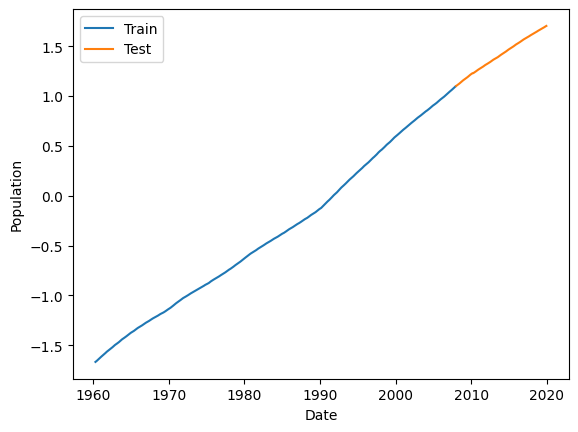

In [68]:
sns.lineplot(x=df['date'].iloc[window:len(y_train) + window], y=y_train[:,0], label='Train')
sns.lineplot(x=df['date'].iloc[len(y_train) + window:], y=y_test[:,0], label='Test')
plt.ylabel('Population')
plt.xlabel('Date')

In [15]:
# from sklearn.linear_model import LinearRegression
# from sklearn.neural_network import MLPRegressor

# # Fit the linear regression model
# model_linear_reg = LinearRegression().fit(x_train.reshape(-1,window), y_train)

# # Use the linear regression model to predict the output values
# y_predicted = model_linear_reg.predict(x_test.reshape(-1,window))

# # Initialize the neural network
# model_nn = MLPRegressor(hidden_layer_sizes=(50,10,10), max_iter=100, solver='sgd')

# # Use the predictions from the linear regression as input to the neural network
# model_nn.fit(x_train.reshape(-1,window), y_train)

# # Make predictions using the neural network
# y_predicted = model_linear_reg.predict(x_test.reshape(-1,window))

# # Plot the results
# # results_chart(y_predicted_nn, y_test, y_train, df['date'].to_numpy(), window)

In [69]:
!pip list
from keras.models import Sequential
from keras.layers import Dense

# Initialize the neural network
model = Sequential()

# Add a dense layer with the same number of input neurons as the window size
model.add(Dense(window, input_dim=window, activation='relu'))

# Add another dense layer with the same number of neurons as the window size
model.add(Dense(window, activation='relu'))

# Add an output layer with a single neuron
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
model.fit(x_train.reshape(-1,window), y_train, epochs=1000, batch_size=10)

# Make predictions using the model
y_predicted = model.predict(x_test.reshape(-1,window))

Package                         Version
------------------------------- -----------
absl-py                         1.3.0
aiohttp                         3.8.3
aiosignal                       1.3.1
anyio                           3.6.2
argcomplete                     1.10.3
argon2-cffi                     21.3.0
argon2-cffi-bindings            21.2.0
asttokens                       2.0.8
astunparse                      1.6.3
async-timeout                   4.0.2
attrs                           22.1.0
backcall                        0.2.0
beautifulsoup4                  4.8.2
bleach                          5.0.1
cachetools                      5.2.0
certifi                         2022.9.24
cffi                            1.15.1
chardet                         3.0.4
charset-normalizer              2.1.1
cmake                           3.24.1.1
colorama                        0.4.6
commonmark                      0.9.1
compressed-rtf                  1.0.6
contextlib2                   

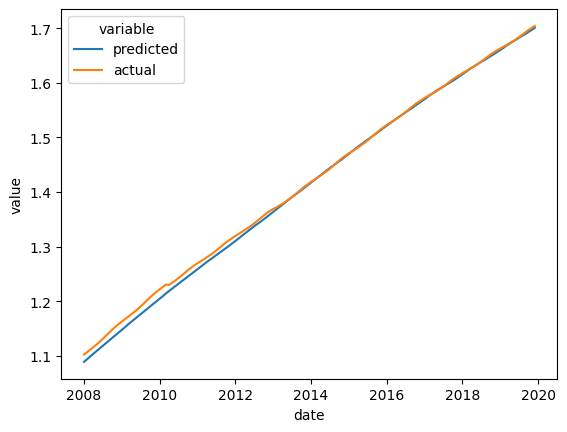

In [70]:
import seaborn as sns

def results_chart(y_predicted, y_test, y_train, dates, window):
    # Create a dataframe with the results
    results = pd.DataFrame({'date': dates[-len(y_test):], 'predicted': y_predicted.flatten(), 'actual': y_test.flatten()})

    # Plot the predicted and actual values using lineplot
    sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(results, ['date']))
    plt.show()


results_chart(y_predicted, y_test, y_train, df['date'].to_numpy(), window)


In [71]:
# Function specific for the lst because of the type of shape
def predict_future_lstm(target, model, window, n=100):
    new_target = target.tolist()
    for i in range(n):
        feature = np.array(new_target[-window:]).reshape(1,window,1)
        target_predicted = model.predict(feature).reshape(1)
        new_target.append(target_predicted)
    return np.array(new_target)

# Generic function for creating our time series with the predicted values
def predict_future(target, model, window, n=100):
    new_target = target.tolist()
    for i in range(n):
        feature = np.array(new_target[-window:]).reshape(-1,window)
        target_predicted = model.predict(feature).reshape(1)
        new_target.append(target_predicted)
    return np.array(new_target)

In [72]:
n = 200
target_model_linear_scaled = predict_future(target_scaled,model,window,n=n)


1/1 [==============================] - 0s 18ms/step


In [73]:
extra_dates = pd.date_range(df['date'].iloc[-1], periods=n + 1, freq='MS')
extra_dates = extra_dates.to_series().reset_index(drop=True).iloc[1:]
all_dates = pd.concat((df['date'], extra_dates), ignore_index=True)

In [74]:
def future_chart(future_target, y_train, y_test, x_date, window, title=''):
    original_target_size = len(y_train) + len(y_test)
    sns.lineplot(x=x_date[window:len(y_train) + window], y=y_train[:,0], label='Train')
    sns.lineplot(x=x_date[len(y_train) + window: original_target_size + window], y=y_test[:,0], label='Test')
    sns.lineplot(x=x_date[original_target_size + window:], y=future_target[original_target_size:,0], label='Predicted')
    plt.title(label=title)
    plt.show()

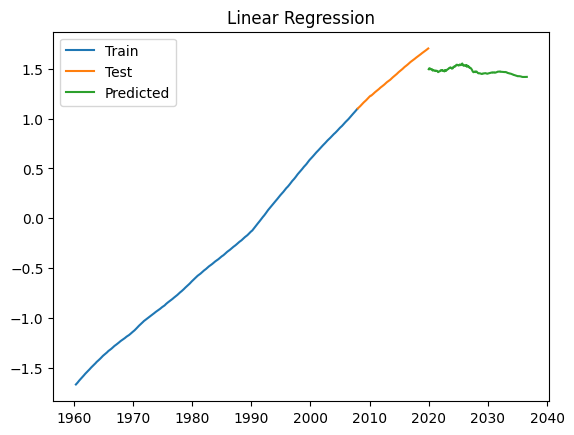

In [75]:
future_chart(target_model_linear_scaled,  y_train, y_test, all_dates, window, title='Linear Regression')